# **Exploratory Data Analisys (EDA)**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import scipy.stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


https://www.kaggle.com/code/kenjee/categorical-feature-engineering-section-7-1?scriptVersionId=134407252&cellId=51


Related Course Workbooks - Machine Learning Process A-Z
Dealing with Missing Values - Section 5.1
Dealing with Outliers - Section 5.2
Basic EDA Example - Section 6
Categorical Feature Engineering - Section 7.1
Numeric Feature Engineering - Section 7.2
Cross Validation Foundations - Section 8
Feature Selection - Section 9
Dealing with Imbalanced Data - Section 10
Model Building Example - Section 11
Model Evaluation (Classification) - Section 11
Model Evlauation (Regression) - Section 11

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_num = train_data[['Age','SibSp','Parch','Fare']]
df_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

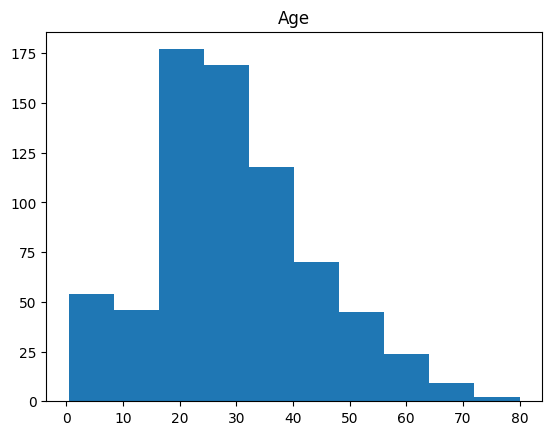

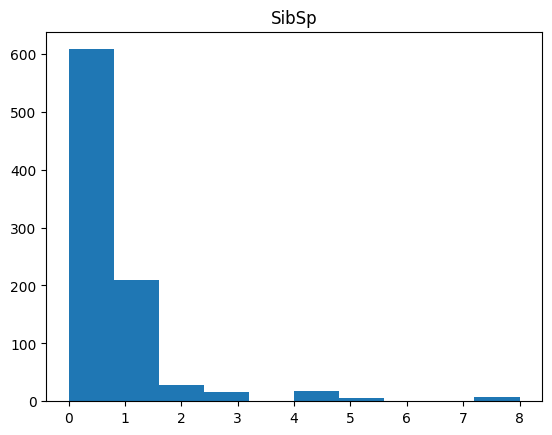

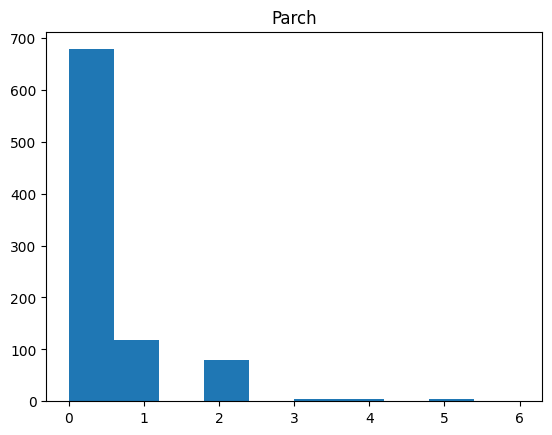

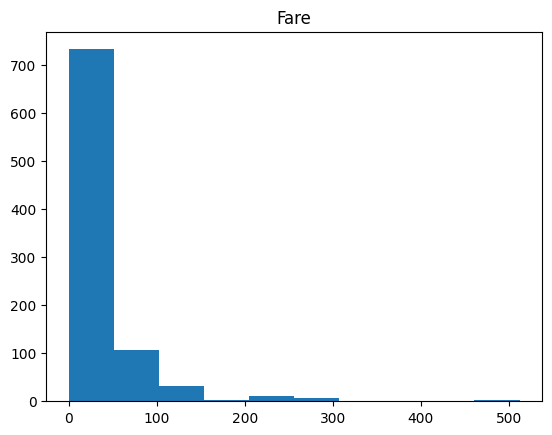

In [6]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

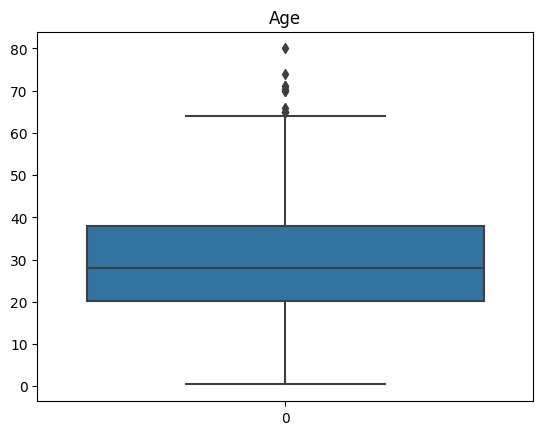

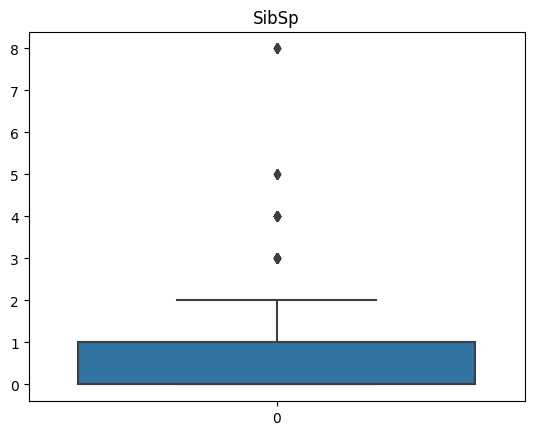

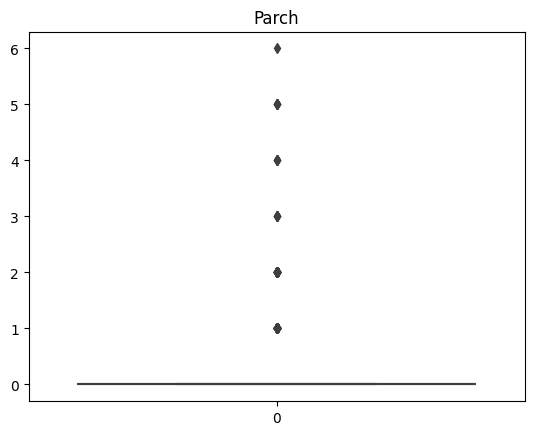

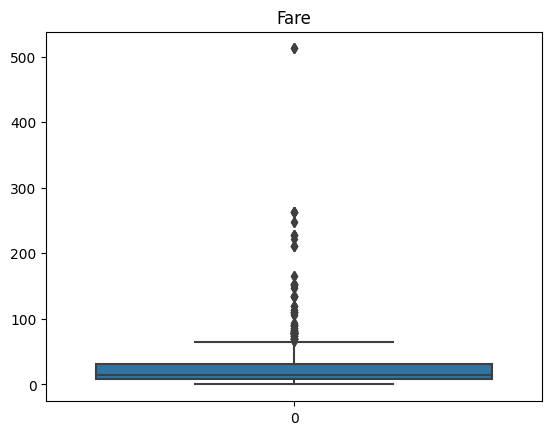

In [7]:
#distributions for all numeric variables 
for i in df_num.columns:
    sn.boxplot(df_num[i])
    plt.title(i)
    plt.show()

In [8]:
train_data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [9]:
train_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [10]:
pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


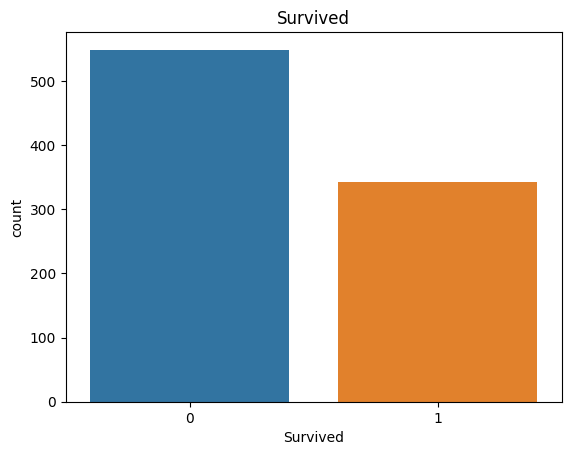

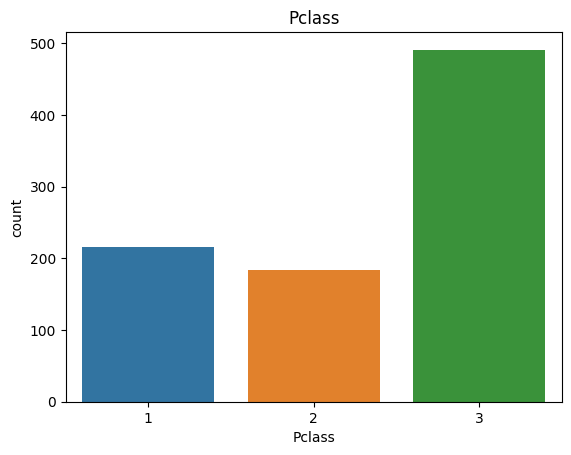

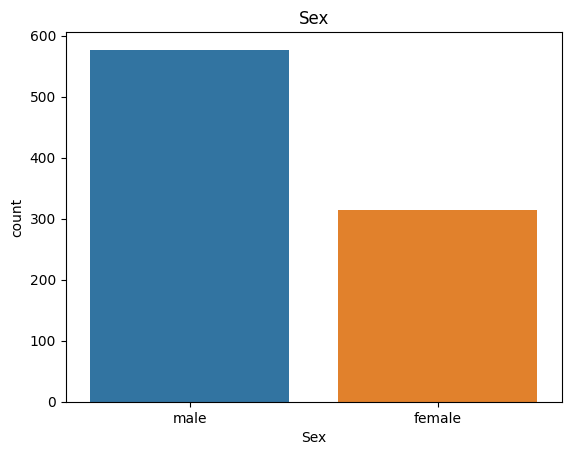

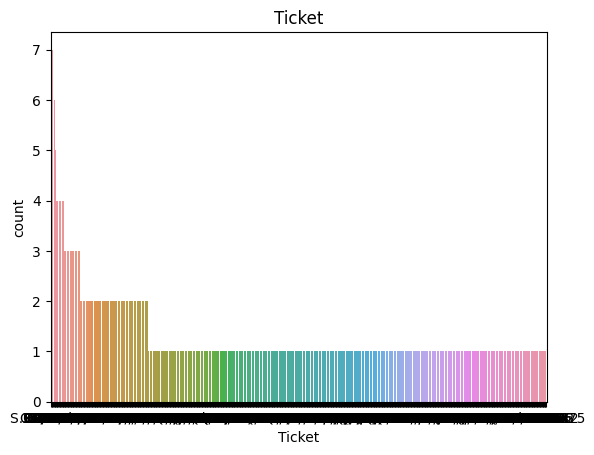

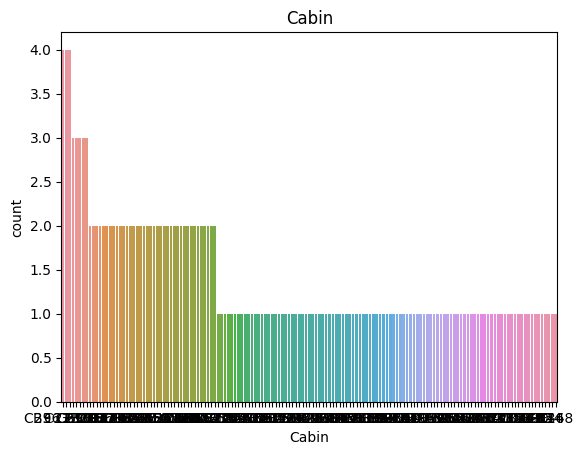

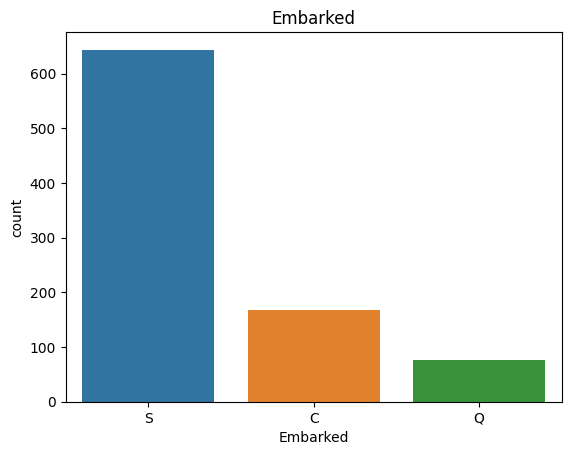

In [11]:
for i in df_cat.columns:
    sn.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [13]:
pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [14]:
pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<Axes: >

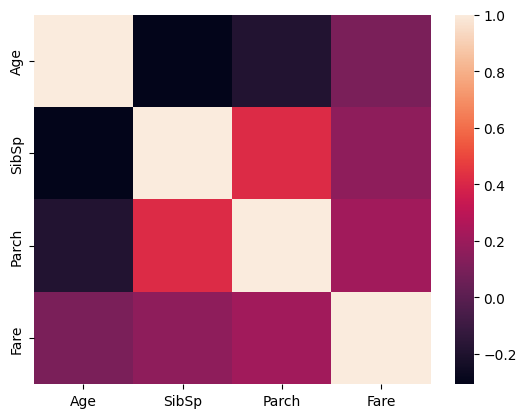

In [15]:
corr = df_num.corr()
sn.heatmap(corr)

<Axes: >

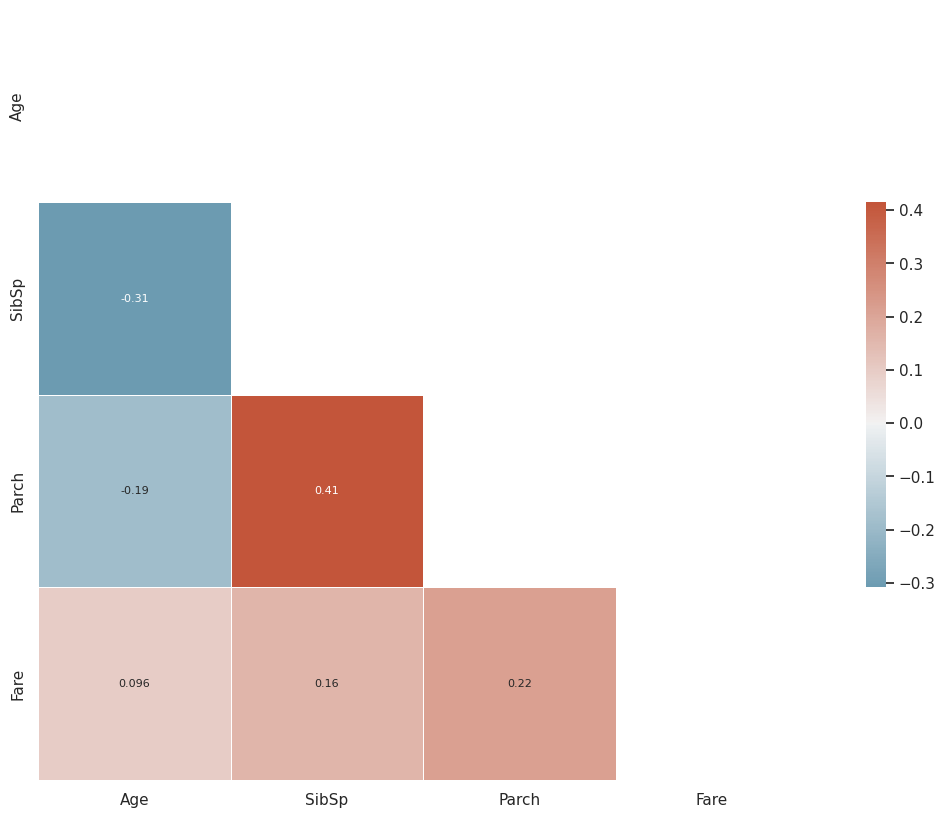

In [16]:
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

sn.set_theme(style="white")

# Compute the correlation matrix
corr = df_num.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sn.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [17]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# **Data Cleaning**

In [18]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage
    
    Parameters:
    df (DataFrame): Dataframe to check
    
    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(train_data)

,null_count,null_pct
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [20]:
# We delete the rows where the variable 'Embarked' is null because there are only 2 null values
train_data.dropna(subset=['Embarked'],inplace = True)
#test_data.dropna(subset=['Embarked'],inplace = True)

In [21]:
train_data.Age = train_data.Age.fillna(train_data.Age.median())
test_data.Age = test_data.Age.fillna(test_data.Age.median())

In [22]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Outliers Detection

Identify outliers with the interquartile interval.

In [23]:
def extract_outliers_from_boxplot(array):
    ## Get IQR
    iqr_q1 = np.quantile(array, 0.25)
    iqr_q3 = np.quantile(array, 0.75)
    med = np.median(array)

    # finding the iqr region
    iqr = iqr_q3-iqr_q1

    # finding upper and lower whiskers
    upper_bound = iqr_q3+(1.5*iqr)
    lower_bound = iqr_q1-(1.5*iqr)

    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    print('Outliers within the box plot are :{}'.format(outliers))
    return outliers

In [24]:
outliers_age = extract_outliers_from_boxplot(train_data['Age'])

Outliers within the box plot are :7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
824     2.00
827     1.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 65, dtype: float64


In [25]:
outliers_SibSp = extract_outliers_from_boxplot(train_data['SibSp'])

Outliers within the box plot are :7      3
16     4
24     3
27     3
50     4
59     5
63     3
68     4
71     5
85     3
88     3
119    4
159    8
164    4
171    4
176    3
180    8
182    4
201    8
229    3
233    4
261    4
266    4
278    4
324    8
341    3
374    3
386    5
409    3
480    5
485    3
541    4
542    4
634    3
642    3
683    5
686    4
726    3
787    4
792    8
813    4
819    3
824    4
846    8
850    4
863    8
Name: SibSp, dtype: int64


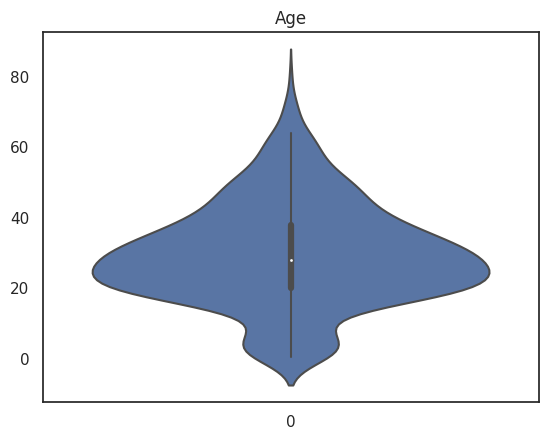

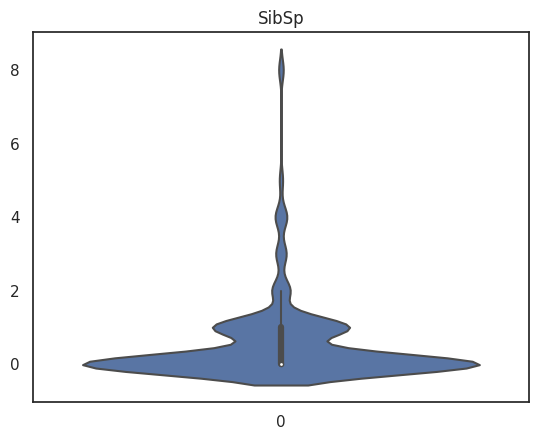

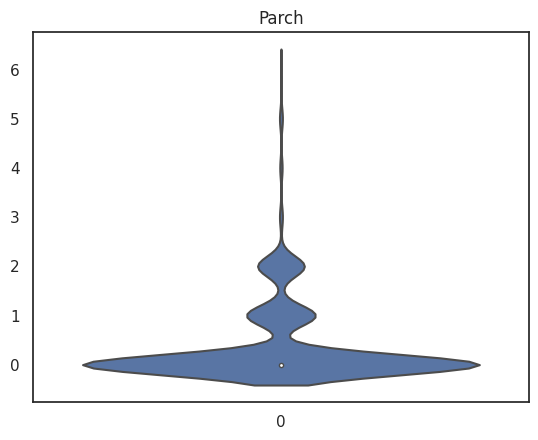

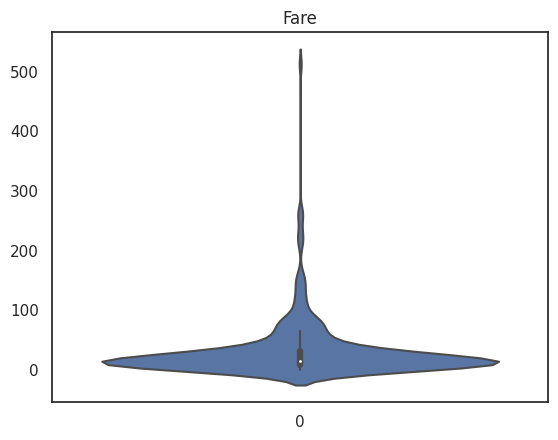

In [26]:
#distributions for all numeric variables 
for i in df_num.columns:
    sn.violinplot(df_num[i])
    plt.title(i)
    plt.show()

Identify outliers with z-scores

In [27]:
def percentile_outliers(array,
                        lower_bound_perc,
                        upper_bound_perc):
    
    upper_bound = np.percentile(array, upper_bound_perc)
    lower_bound = np.percentile(array, lower_bound_perc)
    
    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    
    return outliers

def z_score_outliers(array,
                     z_score_lower,
                     z_score_upper):

    z_scores = scipy.stats.zscore(array)
    outliers = (z_scores > 1.96) | (z_scores < -1.96)
    
    return array[outliers]

In [28]:
percentile_outliers(train_data['Age'],
                    upper_bound_perc = 99,
                    lower_bound_perc = 1)

33     66.00
54     65.00
78      0.83
96     71.00
116    70.50
164     1.00
172     1.00
183     1.00
280    65.00
305     0.92
381     1.00
386     1.00
456    65.00
469     0.75
493    71.00
630    80.00
644     0.75
672    70.00
745    70.00
755     0.67
788     1.00
803     0.42
827     1.00
831     0.83
851    74.00
Name: Age, dtype: float64

In [29]:
z_score_outliers(train_data['Age'],
                 z_score_lower = -1.96,
                 z_score_upper = 1.96)

7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
824     2.00
827     1.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 71, dtype: float64

### Isolation Forest To detect Outliers

In [30]:
from sklearn.ensemble import IsolationForest

## We'll do a simple drop null for now
#
df = df_num.copy()
df = df.dropna()

## Create a training-test set
X = df.copy()

X_train = X[:int(0.8 * len(df_num))]
X_test = X[int(0.8 * len(df_num)):]

## Fit Model
clf = IsolationForest(n_estimators=50, max_samples=100)
clf.fit(X)

## Get Scores
df['scores'] = clf.decision_function(X)


df['anomaly'] = clf.predict(X)


## Get Anomalies
outliers=df.loc[df['anomaly']==-1]

outliers

,Age,SibSp,Parch,Fare,scores,anomaly
7,2.0,3,1,21.0750,-0.082522,-1
8,27.0,0,2,11.1333,-0.025150,-1
13,39.0,1,5,31.2750,-0.162676,-1
16,2.0,4,1,29.1250,-0.118068,-1
24,8.0,3,1,21.0750,-0.073668,-1
...,...,...,...,...,...,...
860,41.0,2,0,14.1083,-0.026378,-1
869,4.0,1,1,11.1333,-0.005933,-1
871,47.0,1,1,52.5542,-0.012427,-1
879,56.0,0,1,83.1583,-0.070716,-1


## Outliers Treatment

### Removal

In [31]:
def z_score_removal(df, column, lower_z_score, upper_z_score):
    
    col_df = df[column]

    z_scores = scipy.stats.zscore(col_df)
    outliers = (z_scores > upper_z_score) | (z_scores < lower_z_score)
    return df[~outliers]

def percentile_removal(df, column, lower_bound_perc, upper_bound_perc):
    
    col_df = df[column]
    
    upper_bound = np.percentile(col_df, upper_bound_perc)
    lower_bound = np.percentile(col_df, lower_bound_perc)

    z_scores = scipy.stats.zscore(col_df)
    outliers = (z_scores > upper_bound) | (z_scores < lower_bound)
    return df[~outliers]

filtered_df_z = z_score_removal(train_data, 'Age', -1.96, 1.96)
filtered_df_per = percentile_removal(train_data, 'Age', lower_bound_perc = 1, upper_bound_perc = 99)

### Winsorize

In [32]:
def winsorize(df, column, upper, lower):
    col_df = df[column]
    
    perc_upper = np.percentile(df[column],upper)
    perc_lower = np.percentile(df[column],lower)
    
    df[column] = np.where(df[column] >= perc_upper, 
                          perc_upper, 
                          df[column])
    
    df[column] = np.where(df[column] <= perc_lower, 
                          perc_lower, 
                          df[column])
    
    return df

In [33]:
winsorized_data = winsorize(train_data, 'Age', 99, 1)

# **Feature Engineer**

In [34]:
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
train_data['cabin_multiple'].value_counts()

test_data['cabin_multiple'] = test_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
test_data['cabin_multiple'].value_counts()

cabin_multiple
0    327
1     74
2     10
3      4
4      3
Name: count, dtype: int64

In [35]:
pd.pivot_table(train_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,120.0,9.0,3.0,2.0


In [36]:
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])
test_data['cabin_adv'] = test_data.Cabin.apply(lambda x: str(x)[0])

In [37]:
#comparing surivial rate by cabin
train_data.cabin_adv.value_counts()

cabin_adv
n    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [38]:
pd.pivot_table(train_data,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,33.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


## Frequency Encoder

In [39]:
class FrequencyEncoder:
    def fit(self, train_df, column):
        self.train_df = train_df
        self.column = column
        self.frequency_encodings = None
        
    def _compute_frequency(self):
        self.frequency_encodings = self.train_df.groupby([self.column]).size()
        
    def transform(self, test_df, column, fillna = True):
        self._compute_frequency()
        
        col_name = column + '_freq'
        test_df[col_name] = test_df[column].map(self.frequency_encodings)
        
        if fillna is True:
            test_df[col_name] = test_df[col_name].fillna(0)
        
        return test_df
    
"""

fe = FrequencyEncoder()
fe.fit(X_train, column = 'neighbourhood')

# Transform Datasets
X_train_freq_enc = fe.transform(X_train, column='neighbourhood')
X_test_freq_enc = fe.transform(X_test, column='neighbourhood')

X_test_freq_enc['neighbourhood_freq']

"""

"\n\nfe = FrequencyEncoder()\nfe.fit(X_train, column = 'neighbourhood')\n\n# Transform Datasets\nX_train_freq_enc = fe.transform(X_train, column='neighbourhood')\nX_test_freq_enc = fe.transform(X_test, column='neighbourhood')\n\nX_test_freq_enc['neighbourhood_freq']\n\n"

## Target Enconder

In [40]:
df_te = train_data.copy()
from sklearn.model_selection import train_test_split

class TargetEncoder:
    def fit(self, train_df, target_col, categ_col):
        self.train_df = train_df
        self.target_col = target_col
        self.categ_col = categ_col
        self.target_encodings = None
        
    def transform(self, test_df, column = None, fillna = True):
        if column is None:
            column = self.categ_col
        
        self.target_encodings = self.train_df.groupby([self.categ_col]).mean()[self.target_col]

        col_name = column + '_target_enc'
        test_df.loc[:,col_name] = test_df[column].map(self.target_encodings)
        
        if fillna is True:
            test_df[col_name] = test_df[col_name].fillna(0)
            
        return test_df

"""
df_train, df_test = train_test_split(df, test_size = 0.33, random_state = 42)

te = TargetEncoder()
te.fit(df_train, target_col = 'price', categ_col = 'neighbourhood')

X_train_te = te.transform(df_train)
X_test_te = te.transform(df_test)

X_test_te
"""

"\ndf_train, df_test = train_test_split(df, test_size = 0.33, random_state = 42)\n\nte = TargetEncoder()\nte.fit(df_train, target_col = 'price', categ_col = 'neighbourhood')\n\nX_train_te = te.transform(df_train)\nX_test_te = te.transform(df_test)\n\nX_test_te\n"

In [41]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape


(889,)

In [42]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

X_train_scaled = np.asarray(X_train_scaled).astype(np.float32)
X_test_scaled = np.asarray(X_test_scaled).astype(np.float32)


y_train = all_data[all_data.train_test==1].Survived

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

2024-02-24 22:50:11.698499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 22:50:11.698768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 22:50:11.908765: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(41,), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1260      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1901 (7.43 KB)
Trainable params: 1901 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [46]:
%%time
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
23/23 [==============================] - 2s 15ms/step - loss: 0.5671 - accuracy: 0.3896 - val_loss: 0.3799 - val_accuracy: 0.3539
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4394 - accuracy: 0.3896 - val_loss: 0.3455 - val_accuracy: 0.3539
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.3896 - val_loss: 0.3274 - val_accuracy: 0.3539
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.3896 - val_loss: 0.3579 - val_accuracy: 0.3539
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.3896 - val_loss: 0.3992 - val_accuracy: 0.3539
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4032 - accuracy: 0.3896 - val_loss: 0.3248 - val_accuracy: 0.3539
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3937 - accuracy: 0.3896 - val_loss: 0.3280 - val_accuracy: 0.3539
Epoch 8/100


In [47]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape=(41,), activation='relu'),  # Reduced complexity
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Lower learning rate
    loss='binary_crossentropy',  # Assuming binary classification
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)  # Early stopping
    ]
)

history.history['val_accuracy'][-1]

0.8483145833015442

In [48]:
def black_box_function(x, y, z):
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(x, input_shape=(41,), activation='relu'),  # Reduced complexity
    tf.keras.layers.Dense(y, activation='relu'),
    tf.keras.layers.Dense(z, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
        loss='binary_crossentropy',  # Assuming binary classification
        metrics=['accuracy']
    )

    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=200,
        verbose=0,
        validation_split=0.2,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)  # Early stopping
        ]
    )

    return -1 * history.history['loss'][-1]

In [49]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (5, 30), 'y': (5, 30), 'z': (5, 30)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [50]:
optimizer.maximize(
    init_points=2,
    n_iter=100,
)

|   iter    |  target   |     x     |     y     |     z     |
-------------------------------------------------------------
| 1         | -0.3908   | 15.43     | 23.01     | 5.003     |
| 2         | -0.3958   | 12.56     | 8.669     | 7.308     |
| 3         | -0.3994   | 15.9      | 22.94     | 5.354     |
| 4         | -0.3819   | 18.31     | 24.68     | 9.372     |
| 5         | -0.3921   | 19.9      | 11.53     | 23.67     |
| 6         | -0.4121   | 10.69     | 8.89      | 28.68     |
| 7         | -0.4204   | 23.16     | 23.22     | 9.867     |
| 8         | -0.3985   | 17.98     | 24.38     | 8.645     |
| 9         | -0.3988   | 18.93     | 24.77     | 9.117     |
| 10        | -0.3799   | 17.22     | 26.03     | 29.48     |
| 11        | -0.3807   | 13.06     | 24.09     | 26.42     |
| 12        | -0.3708   | 26.37     | 22.98     | 27.8      |
| 13        | -0.3795   | 21.93     | 18.7      | 14.58     |
| 14        | -0.4116   | 8.519     | 8.484     | 12.92     |
| 15    

In [51]:
y_hat = model.predict(X_test_scaled)

14/14 [==============================] - 0s 2ms/step


In [52]:
y_hat.shape

(418, 1)

In [53]:
y_hat_classification = np.where(y_hat > 0.5, 1, 0)

In [54]:
print(y_hat_classification.shape)
print(test_data.shape)

(418, 1)
(418, 13)


In [55]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_hat_classification.flatten()})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
